In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

## Plotting   Distribution of predicted probabilities for virus group withheld from training

In [262]:
probsfile = '../results/euk_all.csv'
df = pd.read_csv(probsfile)
df.head()

,Unnamed: 0,Dataset,N in class,Features,k,AUC,Baltimore,Feature set,label tax,label
0,0,Aedes_genus,67,AA,1,0.769,RNA,AA_1,genus,Aedes
1,1,Aedes_genus,67,AA,2,0.639,RNA,AA_2,genus,Aedes
2,2,Aedes_genus,67,AA,3,0.815,RNA,AA_3,genus,Aedes
3,3,Aedes_genus,67,AA,4,0.769,RNA,AA_4,genus,Aedes
4,4,Aedes_genus,67,DNA,1,0.490,RNA,DNA_1,genus,Aedes


In [224]:
concat_fs = lambda row : f'{row["Features"]}_{row["k"]}'
df['Feature set']= df.apply(concat_fs , axis=1)
concat_ds = lambda row: f'{row["positive label"]}_{row["label tax group"][0]}_vs_{row["pool tax group"][0]} '
df['Dataset']= df.apply(concat_ds , axis=1)
df.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Feature set,Dataset
0,Bos taurus,species,Bovidae,family,RNA,69,DNA,1,0.621,0.522,0.000,1.000,[ 0 11 0 12],DNA_1,Bos taurus_s_vs_f
1,Bos taurus,species,Bovidae,family,RNA,69,DNA,2,0.644,0.522,0.182,0.833,[ 2 9 2 10],DNA_2,Bos taurus_s_vs_f
2,Bos taurus,species,Bovidae,family,RNA,69,DNA,3,0.455,0.565,0.364,0.750,[4 7 3 9],DNA_3,Bos taurus_s_vs_f
3,Bos taurus,species,Bovidae,family,RNA,69,DNA,4,0.379,0.391,0.364,0.417,[4 7 7 5],DNA_4,Bos taurus_s_vs_f
4,Bos taurus,species,Bovidae,family,RNA,69,DNA,5,0.477,0.565,0.545,0.583,[6 5 5 7],DNA_5,Bos taurus_s_vs_f


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 15 columns):
positive label     990 non-null object
label tax group    990 non-null object
pool label         990 non-null object
pool tax group     990 non-null object
Baltimore          990 non-null object
N in class         990 non-null int64
Features           990 non-null object
k                  990 non-null int64
AUC                990 non-null float64
accuracy           990 non-null float64
specificity        990 non-null float64
sensitivity        990 non-null float64
TN/FP/FN/TP        990 non-null object
Feature set        990 non-null object
Dataset            990 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 116.1+ KB


In [226]:
tax_order =['p','c','o','f','g','s']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
#ds_list = list(set(results['dataset']))
#df.apply(dflambda row: row['task'].split('_')[1] , axis=1)
#results['tax'] = results.apply(lambda row: row['Dataset'][-6], axis = 1)
df['tax'] = df.apply(lambda row: row['Dataset'][-6], axis = 1)
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)
#results['Dataset'] = results['Dataset'].astype('category')
#results['Dataset'].cat.set_categories(tax_order, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
positive label     990 non-null object
label tax group    990 non-null object
pool label         990 non-null object
pool tax group     990 non-null object
Baltimore          990 non-null object
N in class         990 non-null int64
Features           990 non-null object
k                  990 non-null int64
AUC                990 non-null float64
accuracy           990 non-null float64
specificity        990 non-null float64
sensitivity        990 non-null float64
TN/FP/FN/TP        990 non-null object
Feature set        990 non-null category
Dataset            990 non-null object
tax                0 non-null category
dtypes: category(2), float64(4), int64(2), object(8)
memory usage: 111.3+ KB


In [227]:
#tax_order =['phylum','class','order','family','genus','species']
tax_order =['p','c','o','f','g','s']
df['tax'] = df.apply(lambda row: row['label tax group'][0], axis = 1)
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)


In [228]:
df.head(-10)

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Feature set,Dataset,tax
0,Bos taurus,species,Bovidae,family,RNA,69,DNA,1,0.621,0.522,0.000,1.000,[ 0 11 0 12],DNA_1,Bos taurus_s_vs_f,s
1,Bos taurus,species,Bovidae,family,RNA,69,DNA,2,0.644,0.522,0.182,0.833,[ 2 9 2 10],DNA_2,Bos taurus_s_vs_f,s
2,Bos taurus,species,Bovidae,family,RNA,69,DNA,3,0.455,0.565,0.364,0.750,[4 7 3 9],DNA_3,Bos taurus_s_vs_f,s
3,Bos taurus,species,Bovidae,family,RNA,69,DNA,4,0.379,0.391,0.364,0.417,[4 7 7 5],DNA_4,Bos taurus_s_vs_f,s
4,Bos taurus,species,Bovidae,family,RNA,69,DNA,5,0.477,0.565,0.545,0.583,[6 5 5 7],DNA_5,Bos taurus_s_vs_f,s
5,Bos taurus,species,Bovidae,family,RNA,69,DNA,6,0.538,0.565,0.545,0.583,[6 5 5 7],DNA_6,Bos taurus_s_vs_f,s
6,Bos taurus,species,Bovidae,family,RNA,69,DNA,7,0.621,0.609,0.455,0.750,[5 6 3 9],DNA_7,Bos taurus_s_vs_f,s
7,Bos taurus,species,Bovidae,family,RNA,69,DNA,9,0.629,0.696,0.455,0.917,[ 5 6 1 11],DNA_9,Bos taurus_s_vs_f,s
8,Bos taurus,species,Bovidae,family,RNA,69,AA,1,0.273,0.435,0.273,0.583,[3 8 5 7],AA_1,Bos taurus_s_vs_f,s
9,Bos taurus,species,Bovidae,family,RNA,69,AA,2,0.545,0.565,0.636,0.500,[7 4 6 6],AA_2,Bos taurus_s_vs_f,s


p 2
c 4
o 10
f 14
g 11
s 7


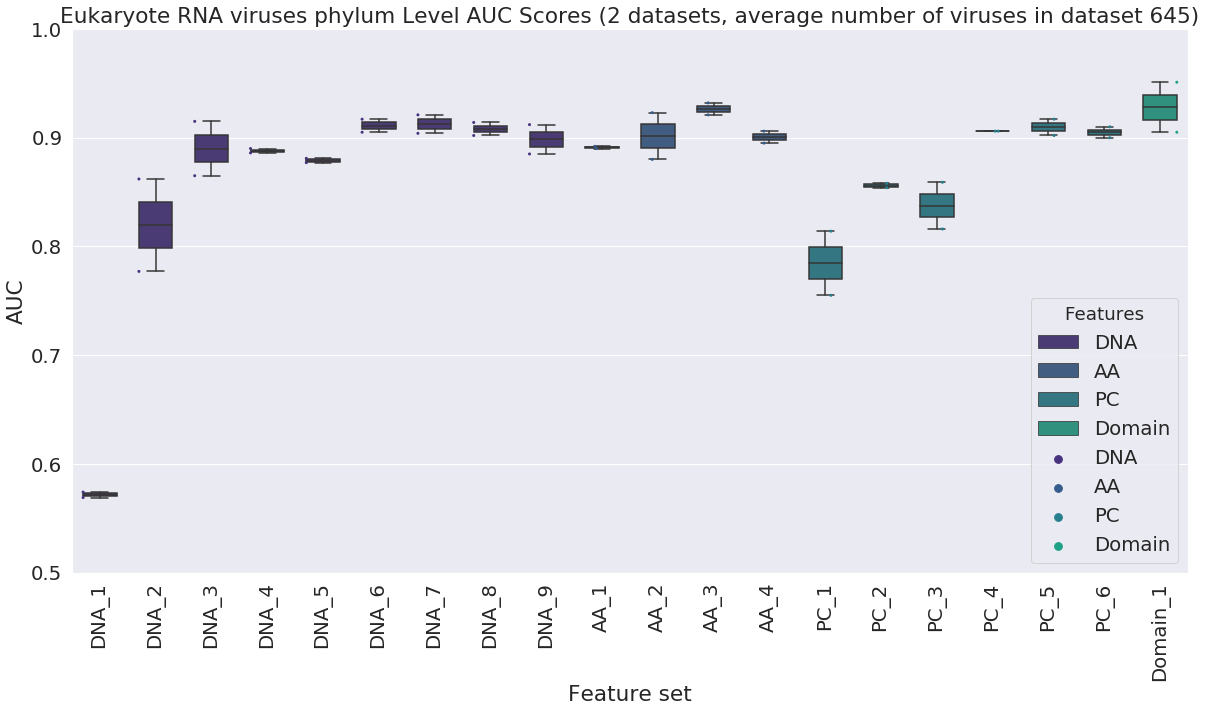

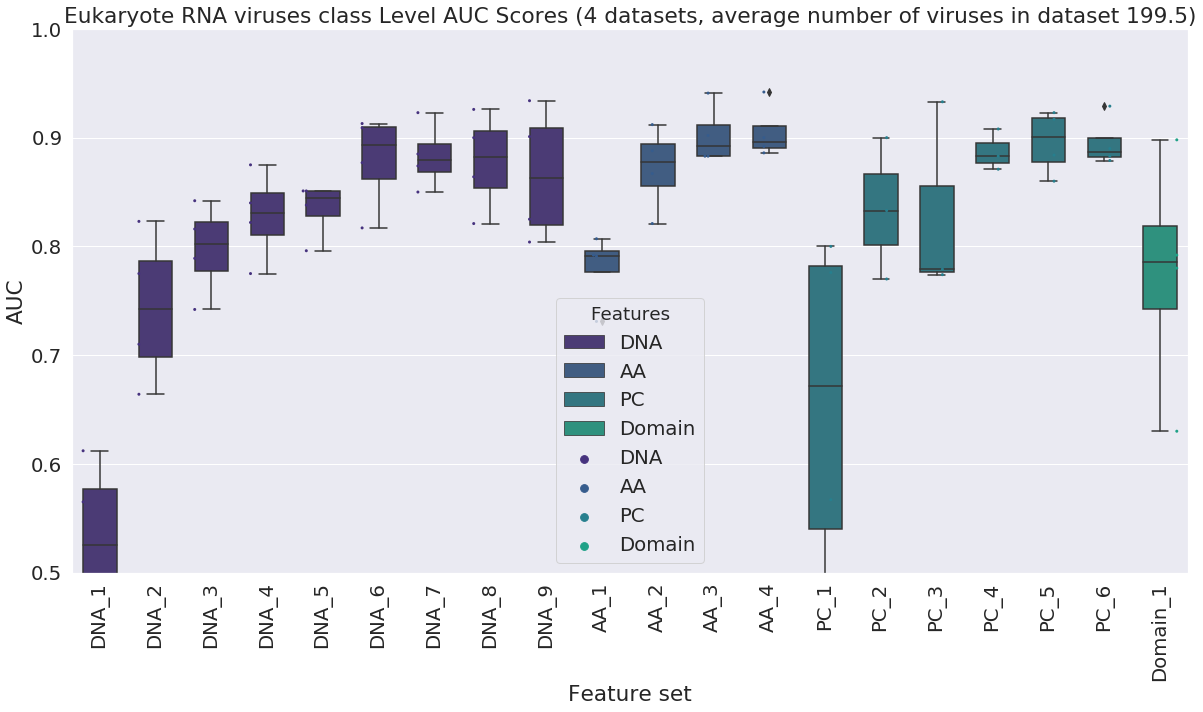

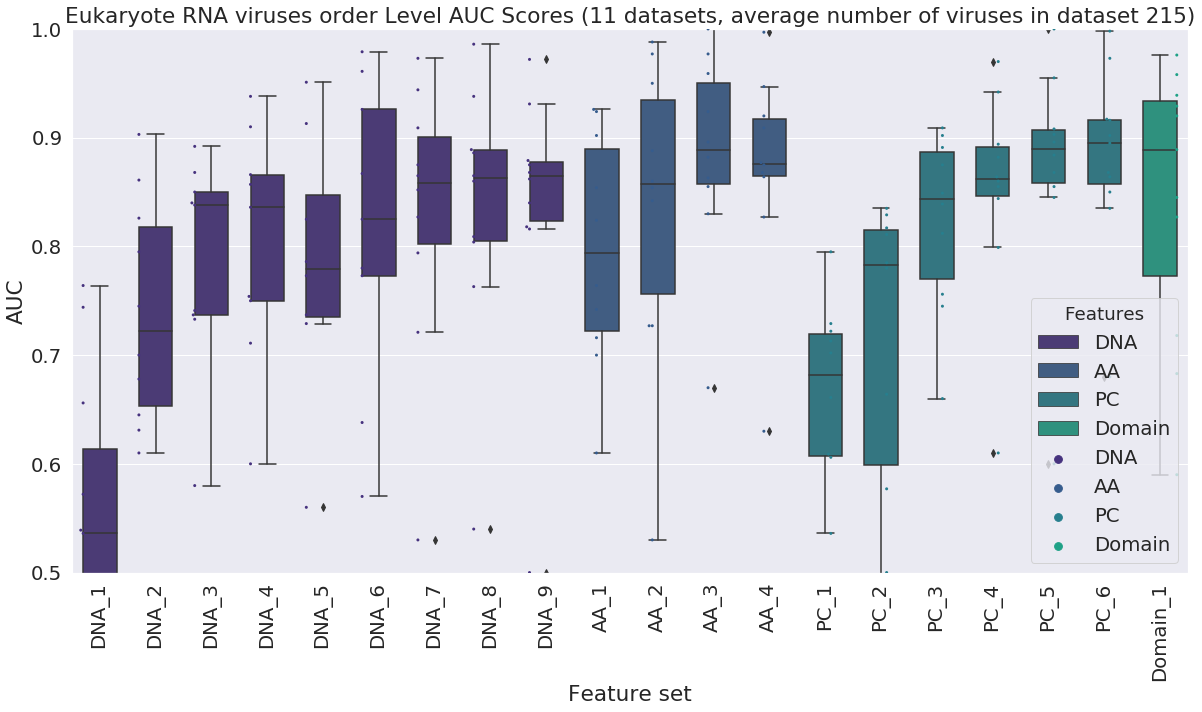

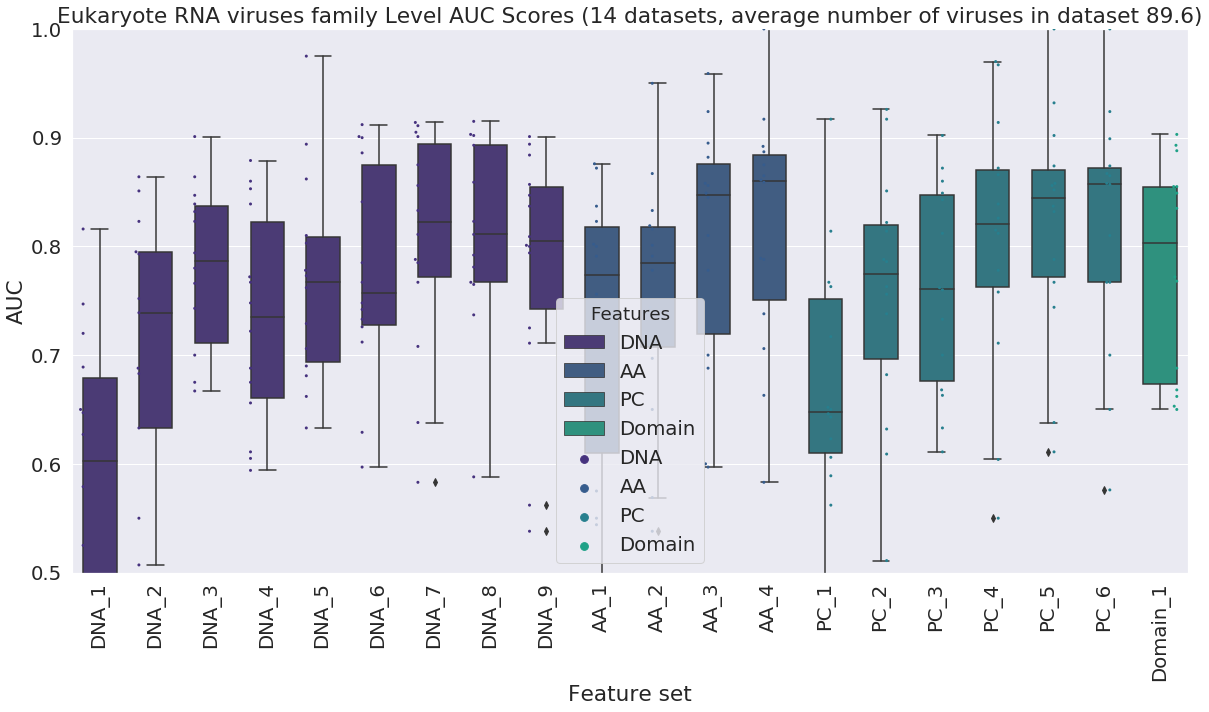

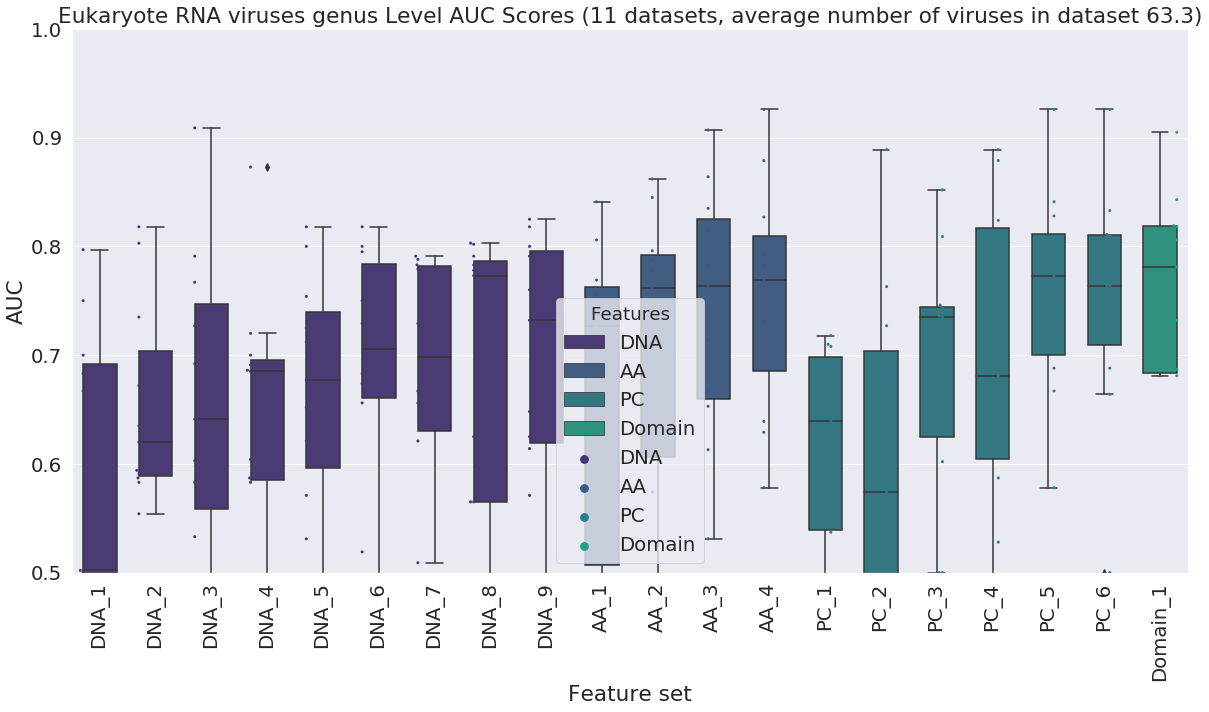

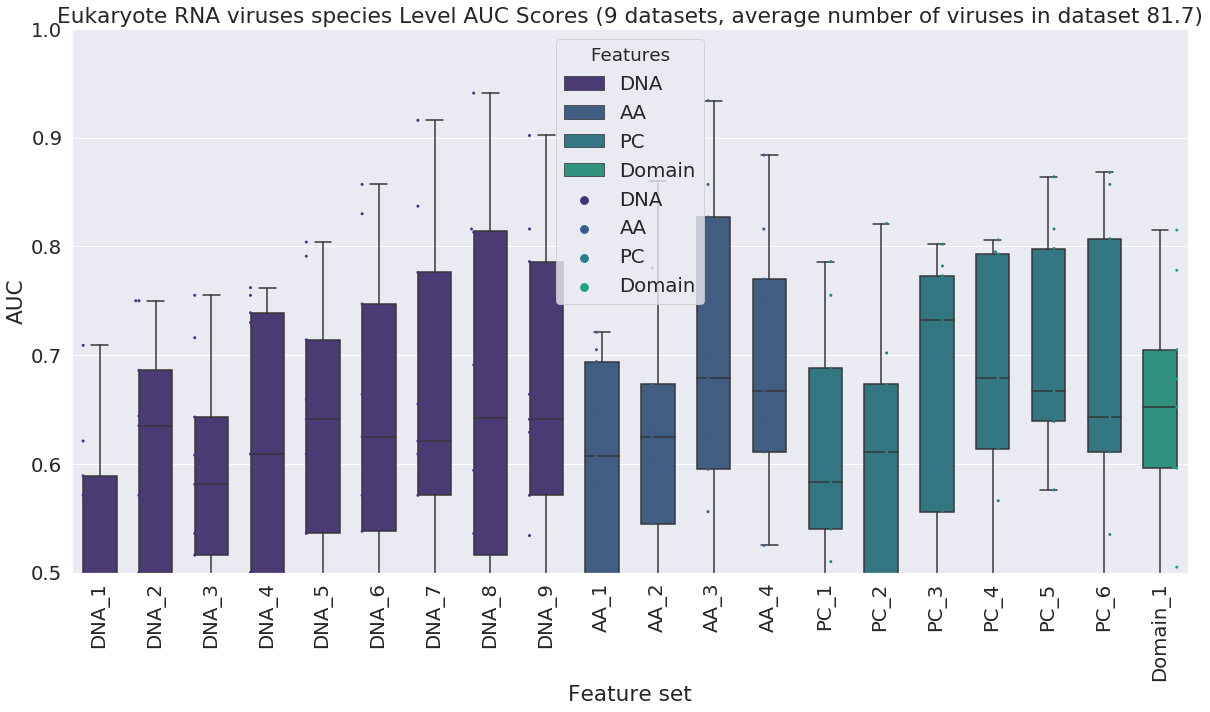

In [261]:
taxlevels = ['p','c','o','f','g','s']
taxranks = ['phylum','class','order','family','genus','species']
for i, t in enumerate(taxlevels):
 
    ss= df[df.tax == t]
    nds =len(set(ss['Dataset']))
    print (t,len(list(set(ss['N in class']))))
    meands =round(s.mean(list(set(ss['N in class']))),1)


    #n =round(s.mean(list(set(ss['N in class']))),1)
    sns.set(font_scale=1.8, palette = 'viridis')
    #grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)
    f, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation='vertical')
    plt.title(f'Eukaryote RNA viruses {taxranks[i]} Level AUC Scores ({nds} datasets, average number of viruses in dataset {meands})')
    sns.boxplot( x = 'Feature set', y ='AUC', hue = 'Features',width =0.6,linewidth =1.5,dodge = False, data = ss)

    sp = sns.swarmplot(data = ss,x = 'Feature set',
                     y = 'AUC',hue = 'Features',
                    size = 3, dodge = True)

    sp.set(ylim = (0.5,1.0) ) 
plt.show()
   # f.savefig(f'Figures/{taxlevels[i]}_bxplt_Euk_RNA.png')

/home4/youn01f/Desktop/workspace/myenv/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


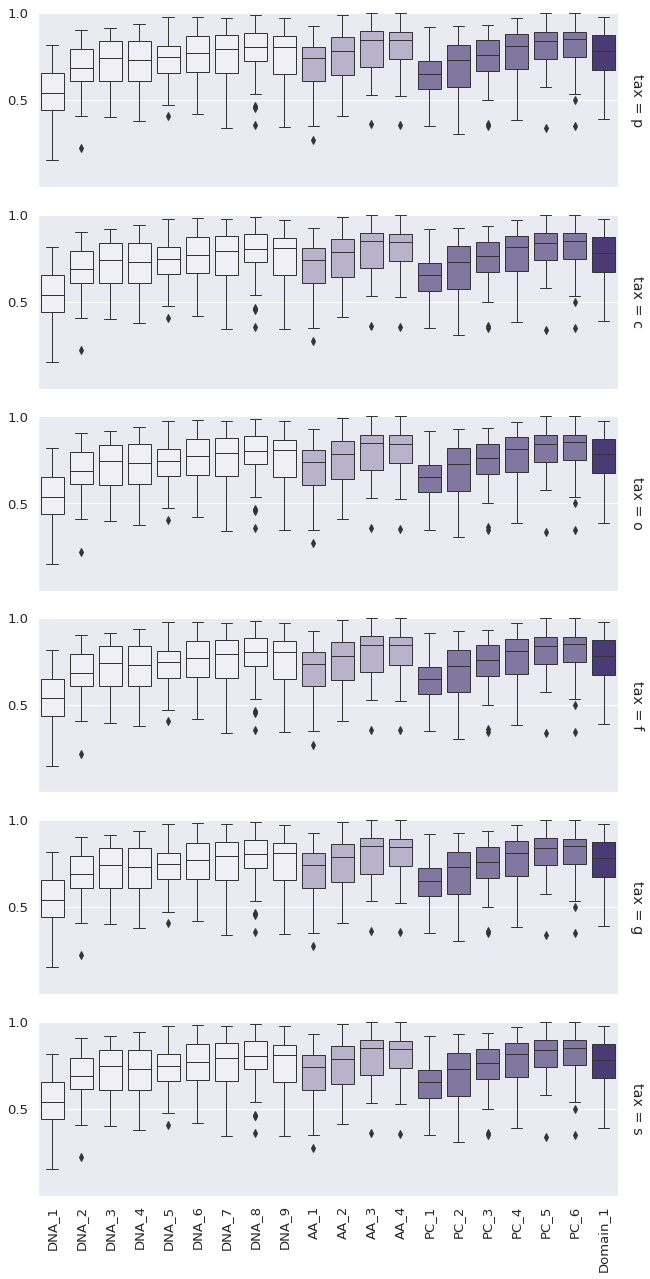

In [232]:
sns.set(font_scale=1.2, palette = 'viridis')
grid = sns.FacetGrid(data= df, row="tax",  margin_titles=True,legend_out = True,
                   aspect =3, palette = 'viridis')


#f, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation='vertical')
grid.map(sns.boxplot, x = 'Feature set', y ='AUC', hue = 'Features',width =0.8,linewidth =1,dodge = False, 
             data = df)
# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)

#grid.add_legend();

# Adjust the tick positions and labels
grid.set( yticks=[0.5, 1],

         ylim=(0, 1))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=2)
#grid.savefig('fig1.1.png')

In [233]:
concat_n = lambda row: f'{row["Dataset"]}_{row["N in class"]} '
df['Dataset_n']= df.apply(concat_n , axis=1)
df.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Feature set,Dataset,tax,Dataset_n
0,Bos taurus,species,Bovidae,family,RNA,69,DNA,1,0.621,0.522,0.000,1.000,[ 0 11 0 12],DNA_1,Bos taurus_s_vs_f,s,Bos taurus_s_vs_f _69
1,Bos taurus,species,Bovidae,family,RNA,69,DNA,2,0.644,0.522,0.182,0.833,[ 2 9 2 10],DNA_2,Bos taurus_s_vs_f,s,Bos taurus_s_vs_f _69
2,Bos taurus,species,Bovidae,family,RNA,69,DNA,3,0.455,0.565,0.364,0.750,[4 7 3 9],DNA_3,Bos taurus_s_vs_f,s,Bos taurus_s_vs_f _69
3,Bos taurus,species,Bovidae,family,RNA,69,DNA,4,0.379,0.391,0.364,0.417,[4 7 7 5],DNA_4,Bos taurus_s_vs_f,s,Bos taurus_s_vs_f _69
4,Bos taurus,species,Bovidae,family,RNA,69,DNA,5,0.477,0.565,0.545,0.583,[6 5 5 7],DNA_5,Bos taurus_s_vs_f,s,Bos taurus_s_vs_f _69


### Sort the dataset order

In [1]:

df1 =df.sort_values('label tax group')
unique =[]
[unique.append(ds) for ds in(list(df['Dataset_n']))if ds not in unique ]
unique

NameError: name 'df' is not defined

In [235]:
df2 = df1.pivot('Dataset_n','Feature set', 'AUC')
df3= df2.reindex(unique)
df3.head()


Feature set,DNA_1,DNA_2,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,AA_1,AA_2,AA_3,AA_4,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Domain_1
Dataset_n,,,,,,,,,,,,,,,,,,,,
Bos taurus_s_vs_f _69,0.621,0.644,0.455,0.379,0.477,0.538,0.621,NaN,0.629,0.273,0.545,0.595,0.667,0.394,0.409,0.348,0.614,0.667,0.636,0.705
Bos_g_vs_f _62,0.500,0.620,0.440,0.431,0.407,0.519,0.509,0.565,0.648,0.472,0.574,0.667,0.731,0.639,0.440,0.500,0.657,0.713,0.731,0.389
Ovis aries_s_vs_f _28,0.589,0.750,0.536,0.482,0.473,0.571,0.571,0.536,0.571,0.607,0.625,0.679,0.643,0.786,0.625,0.732,0.679,0.643,0.643,0.652
Bovidae_f_vs_c _169,0.465,NaN,0.832,0.853,0.810,0.900,0.914,0.915,0.901,0.800,0.867,0.895,0.892,0.606,0.786,0.872,0.914,0.902,0.899,0.903
Sus scrofa_s_vs_c _108,0.336,0.408,0.608,0.730,0.791,0.830,0.916,0.941,0.902,0.721,0.780,0.934,0.884,0.755,0.673,0.782,0.795,0.864,0.868,0.778


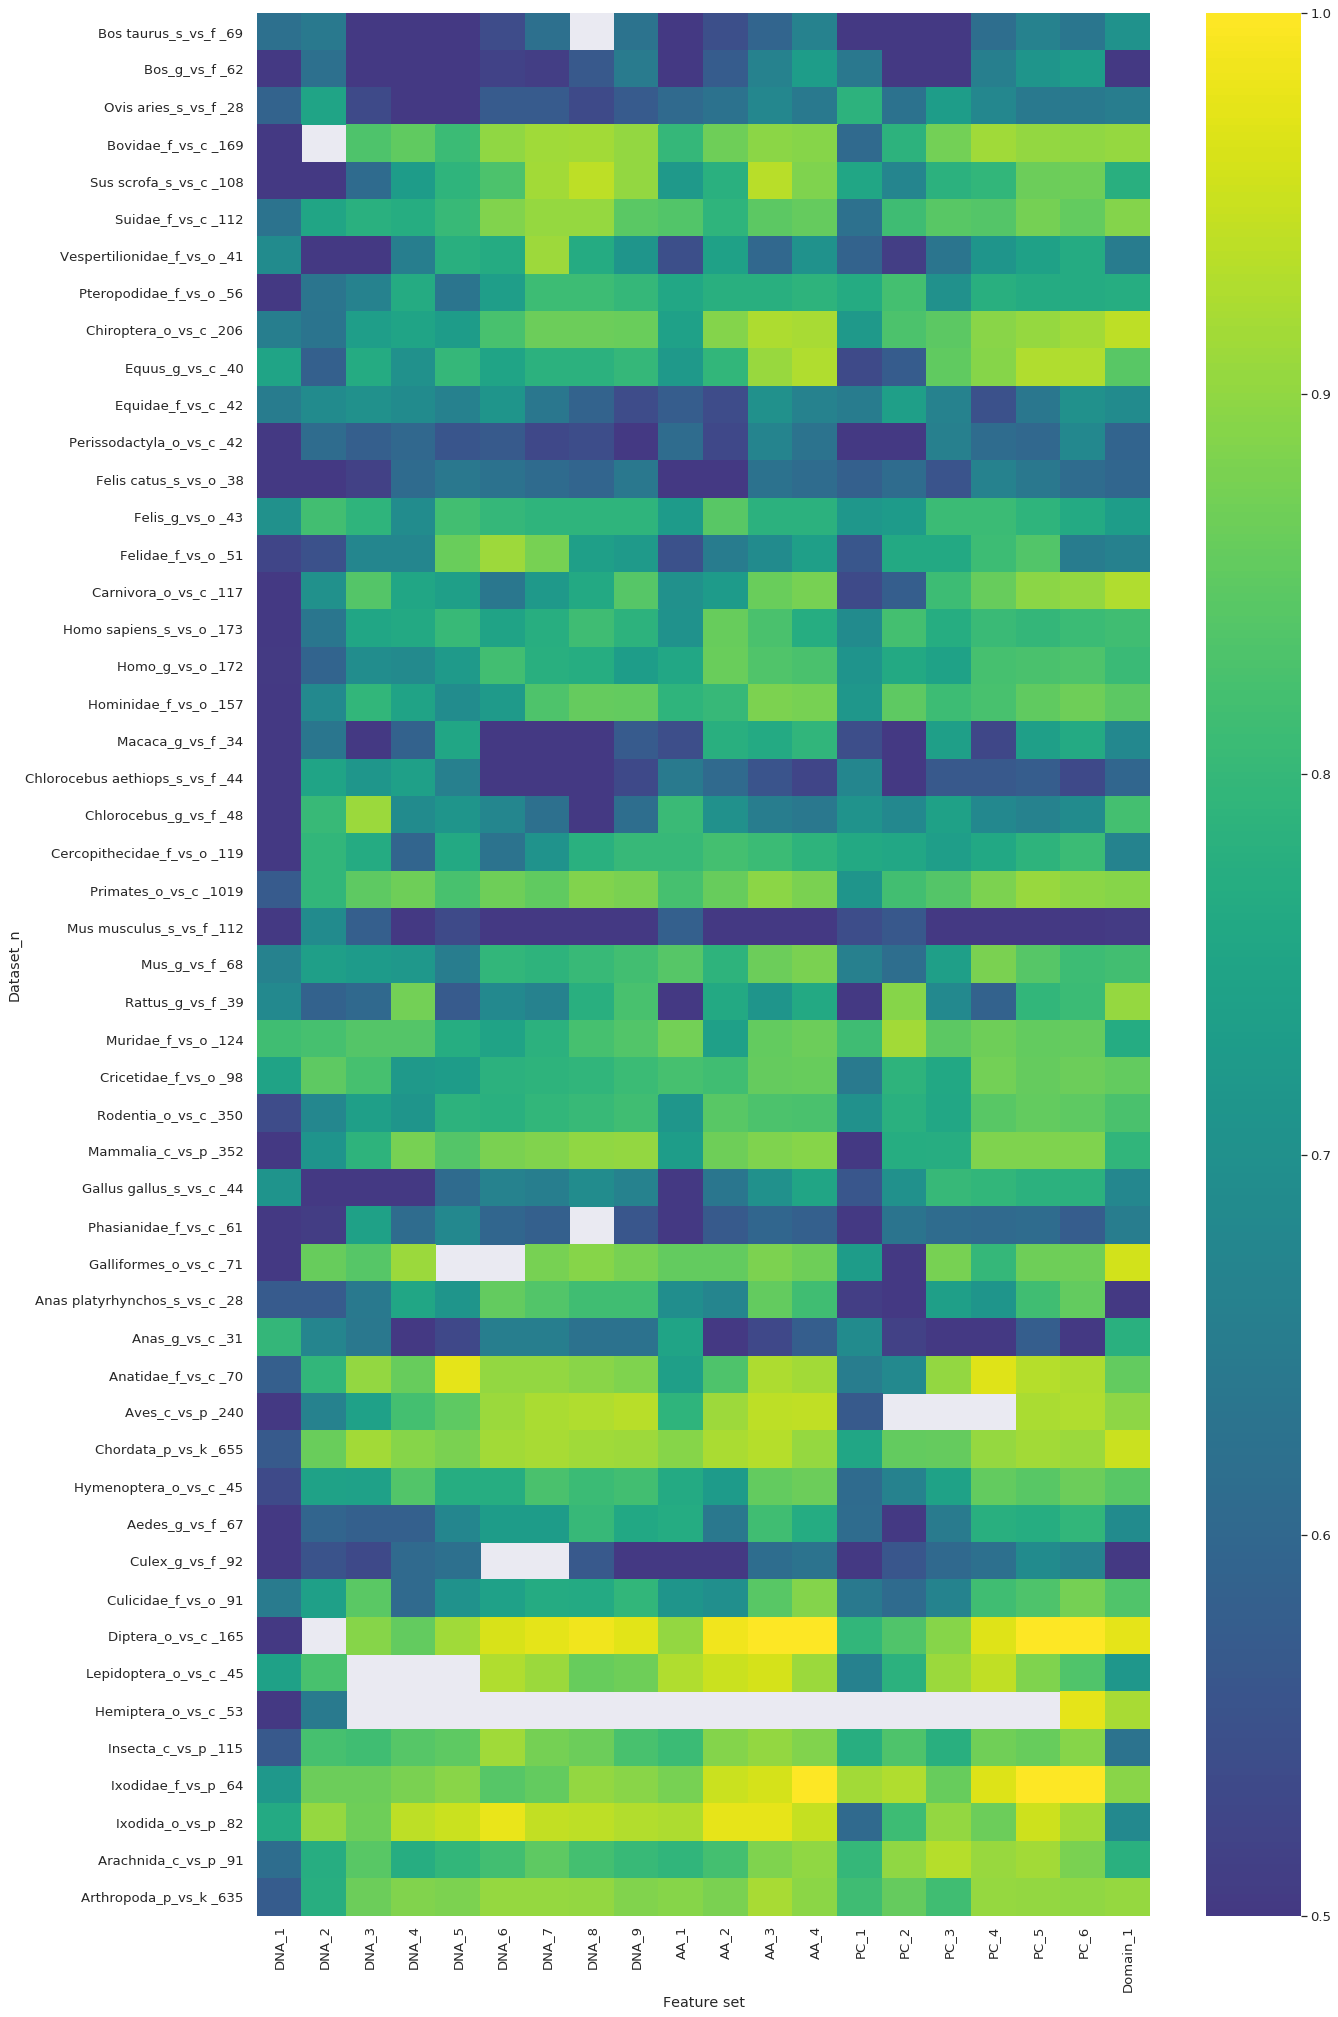

In [236]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 35))
sns.heatmap(df3,cmap = 'viridis',center =0.7, vmin = 0.5,   ax=ax)
f.savefig('Figures/heatmap_Euk_all.png')

In [ ]:
# label_order = ['Metazoa','Chordata','Mammalia','Primates']
# balt_order = ['dsDNA','ssDNA', '(-)ssRNA' , '(+)ssRNA','dsRNA', 'Retro']
# df['label'] = df['label'].astype("category")
# df['label'].cat.set_categories(label_order, inplace=True)
# df['baltimore'] = df['baltimore'].astype("category")
# df['baltimore'].cat.set_categories(balt_order, inplace=True)

# dfA = df.sort_values(["label","baltimore","X"])

In [237]:
ss =df[ df['positive label'].isin (['Arthropoda','Chordata'])]

In [208]:
ss

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Feature set,Dataset,tax
100,Vespertilionidae,family,Chiroptera,order,all,74,DNA,1,0.417,0.680,0.615,0.750,[8 5 3 9],DNA_1,Vespertilionidae_f_vs_o,f
101,Vespertilionidae,family,Chiroptera,order,all,74,DNA,2,0.455,0.480,0.462,0.500,[6 7 6 6],DNA_2,Vespertilionidae_f_vs_o,f
102,Vespertilionidae,family,Chiroptera,order,all,74,DNA,3,0.769,0.760,0.692,0.833,[ 9 4 2 10],DNA_3,Vespertilionidae_f_vs_o,f
103,Vespertilionidae,family,Chiroptera,order,all,74,DNA,4,0.737,0.680,0.615,0.750,[8 5 3 9],DNA_4,Vespertilionidae_f_vs_o,f
104,Vespertilionidae,family,Chiroptera,order,all,74,DNA,5,0.526,0.560,0.462,0.667,[6 7 4 8],DNA_5,Vespertilionidae_f_vs_o,f
105,Vespertilionidae,family,Chiroptera,order,all,74,DNA,6,0.481,0.480,0.385,0.583,[5 8 5 7],DNA_6,Vespertilionidae_f_vs_o,f
106,Vespertilionidae,family,Chiroptera,order,all,74,DNA,7,0.506,0.600,0.308,0.917,[ 4 9 1 11],DNA_7,Vespertilionidae_f_vs_o,f
107,Vespertilionidae,family,Chiroptera,order,all,74,DNA,8,0.545,0.640,0.308,1.000,[ 4 9 0 12],DNA_8,Vespertilionidae_f_vs_o,f
108,Vespertilionidae,family,Chiroptera,order,all,74,DNA,9,0.635,0.560,0.154,1.000,[ 2 11 0 12],DNA_9,Vespertilionidae_f_vs_o,f
109,Vespertilionidae,family,Chiroptera,order,all,74,AA,1,0.455,0.542,0.692,0.364,[9 4 7 4],AA_1,Vespertilionidae_f_vs_o,f


In [240]:
ss =df[ df['positive label'].isin (danslists)] 

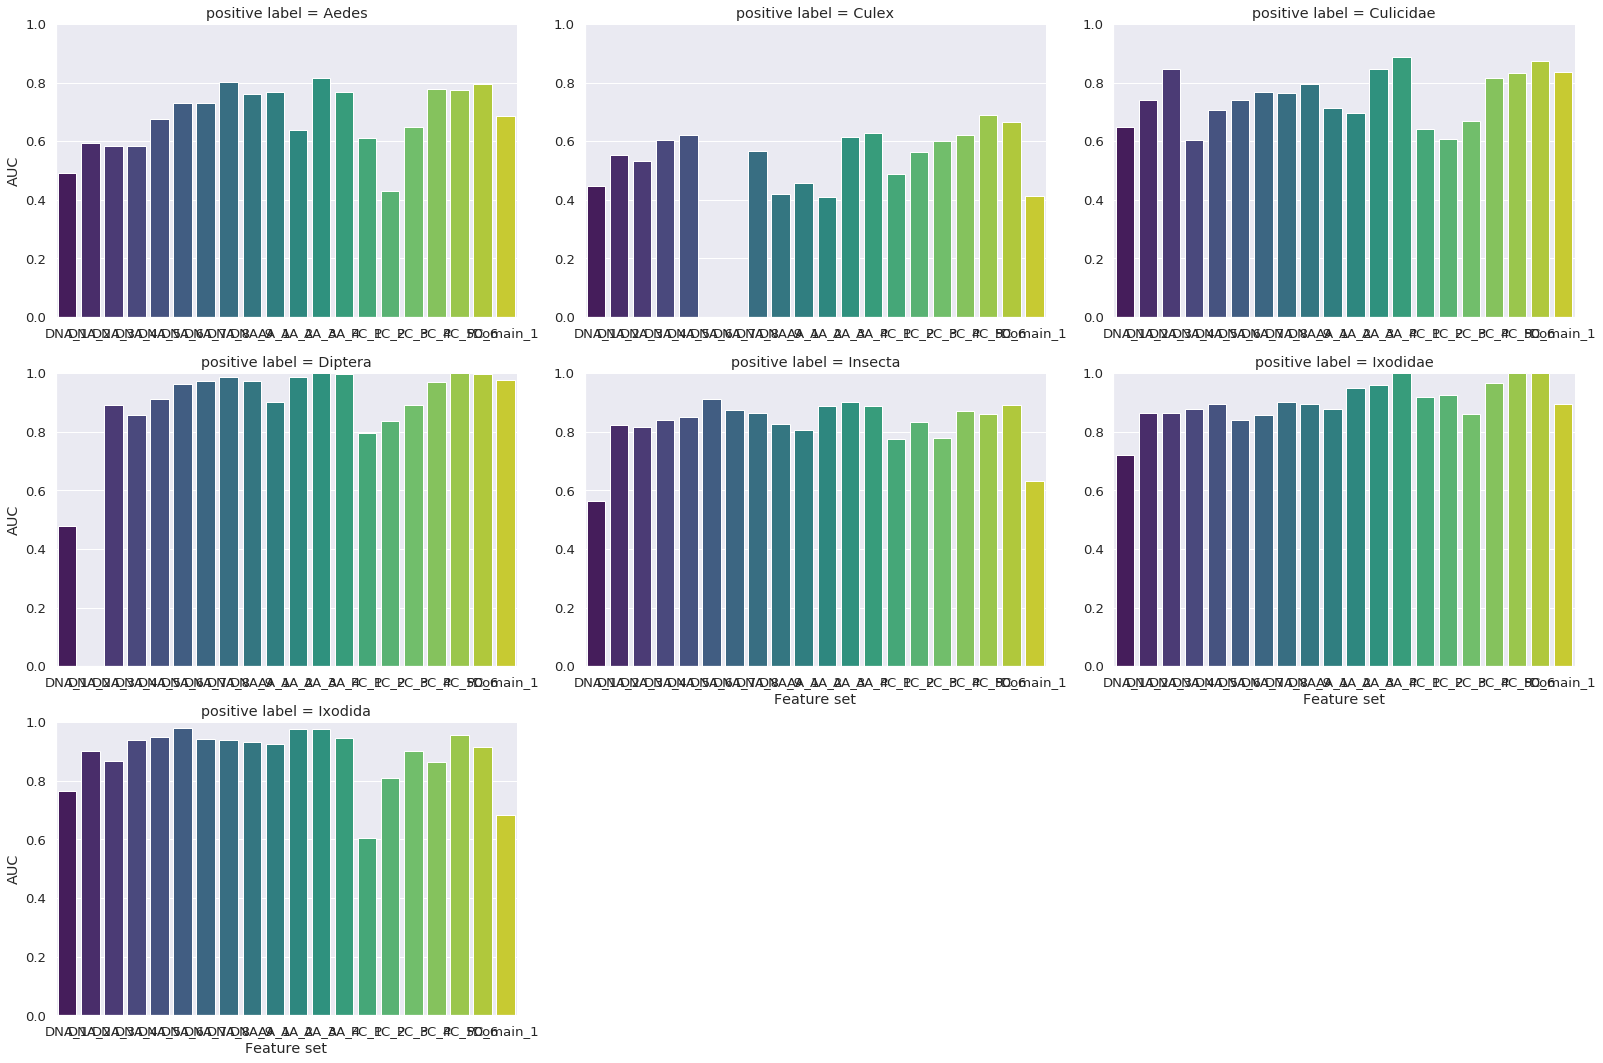

In [241]:
sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =3)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
#[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

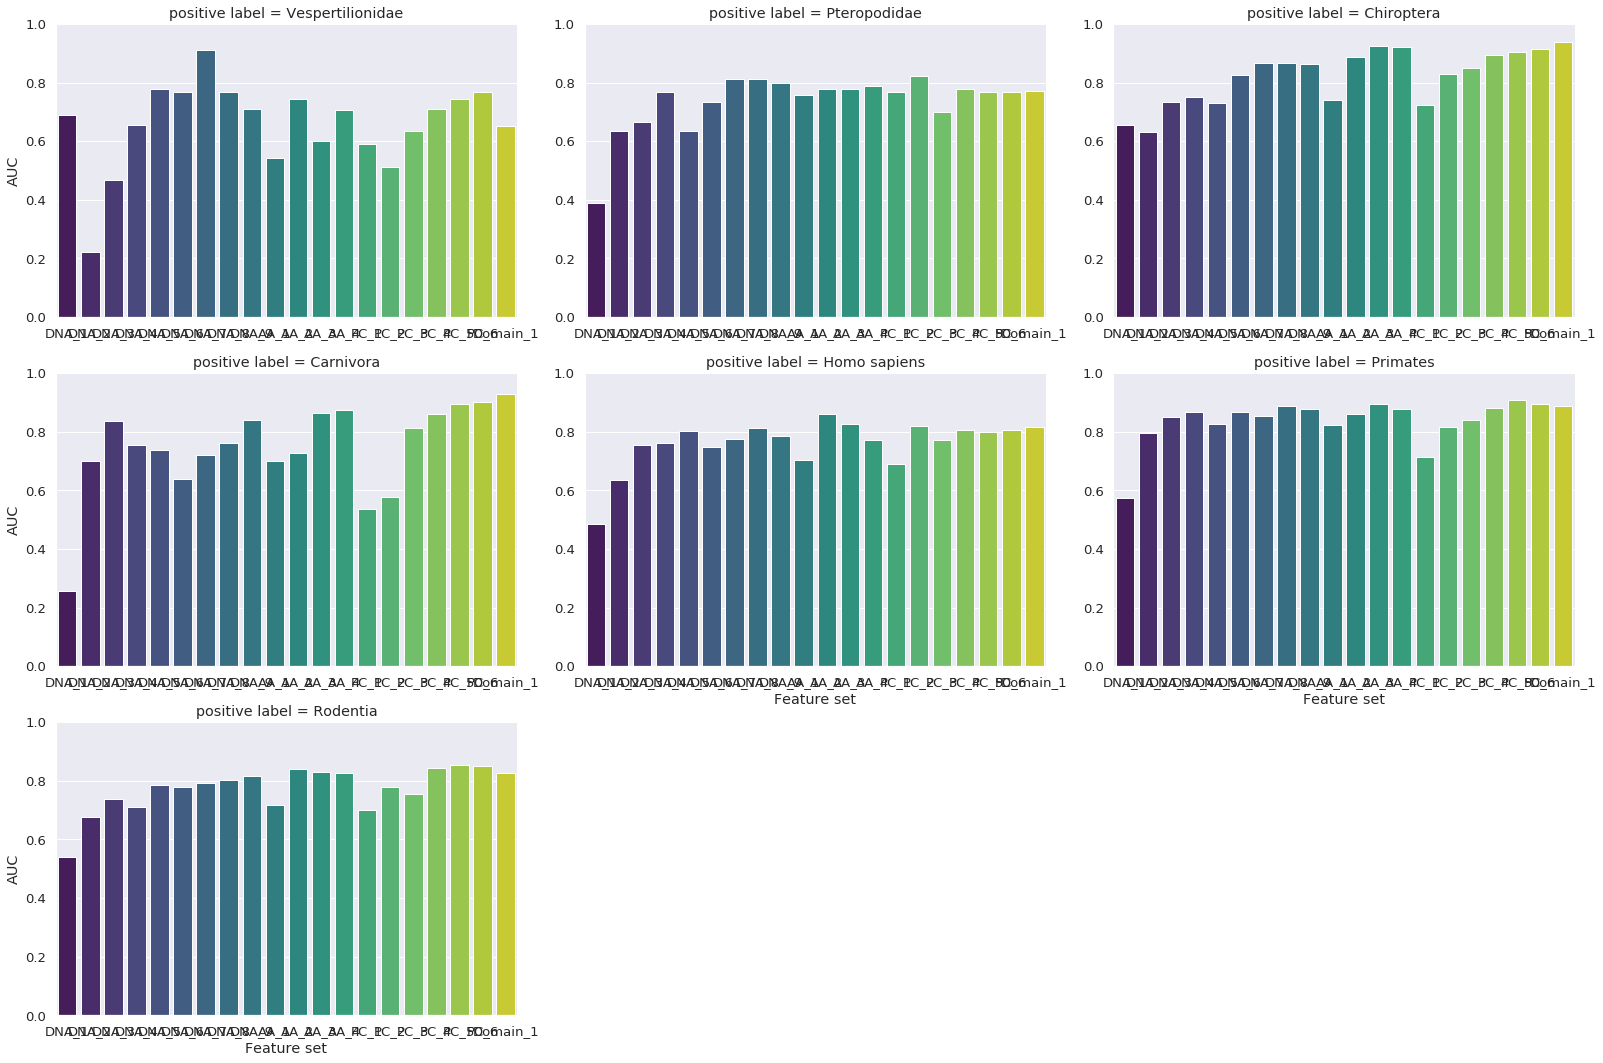

In [244]:
ss =df[ df['positive label'].isin (danslist2)] 


sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =3)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
#[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

In [198]:
set(df['positive label'])

{'Aedes',
 'Anas',
 'Anatidae',
 'Arachnida',
 'Arthropoda',
 'Aves',
 'Bivalvia',
 'Bos',
 'Bos taurus',
 'Canidae',
 'Canis lupus',
 'Carnivora',
 'Cercopithecidae',
 'Chiroptera',
 'Chlorocebus',
 'Chlorocebus aethiops',
 'Chordata',
 'Cricetidae',
 'Culex',
 'Culicidae',
 'Decapoda',
 'Diptera',
 'Equidae',
 'Equus',
 'Equus caballus',
 'Eulipotyphla',
 'Felidae',
 'Felis',
 'Felis catus',
 'Galliformes',
 'Gallus gallus',
 'Hemiptera',
 'Hominidae',
 'Homo',
 'Homo sapiens',
 'Hymenoptera',
 'Insecta',
 'Ixodida',
 'Ixodidae',
 'Lepidoptera',
 'Libellulidae',
 'Macaca',
 'Macaca mulatta',
 'Mammalia',
 'Meleagris gallopavo',
 'Mollusca',
 'Muridae',
 'Mus',
 'Mus musculus',
 'Noctuidae',
 'Odonata',
 'Ovis aries',
 'Pan',
 'Pan troglodytes',
 'Passeriformes',
 'Perissodactyla',
 'Phasianidae',
 'Phyllostomidae',
 'Primates',
 'Pteropodidae',
 'Pteropus',
 'Rattus',
 'Rattus norvegicus',
 'Rhinolophus',
 'Rodentia',
 'Suidae',
 'Sus scrofa',
 'Veneroida',
 'Vespertilionidae'}

In [243]:
danslists =['Culex', 'Culicidae','Aedes','Diptera','Insecta', 'Ixodida','Ixodidae']
#
danslist2 =['Rodentia','Carnivora','Homo sapiens','Primates','Chiroptera','Pteropodidae','Phyllostomidae','Vespertilionidae']

In [254]:
ss =df[ df['label tax group']== 'genus'and df['positive label'].isin (danslists)] 


sns.set(font_scale=1.2)

ss.melt ('positive label','AUC','Feature set')
g =sns.FacetGrid(ss,col ='positive label',sharey = False,sharex=False, height=5, aspect=1.5, col_wrap =4)
g.map(sns.barplot,'Feature set','AUC',palette ='viridis',order = fs_order,)
# ax1,ax2 = g.axes[0]
# ax1.axhline(0.81, xmin=0., xmax=1,linewidth=3, color='r')
# ax2.axhline(0.66, xmin=0, xmax=1,linewidth=4, color='r')
[plt.setp (ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.set(ylim = (0,1) )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().